### Importamos variables

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [2]:
df = pd.read_csv(r"data\raw\Location_Data.csv")
df.head()

,customer_id,country,state,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,United States,California,Camarillo,93010,42853,34.227846,-119.079903


|Column Name |	Description| 
|--------------|----------|
|CustomerID	| A unique ID that identifies each customer.|
|Country|	The country of the customer’s primary residence.|
|State|	The state of the customer’s primary residence.|
|City|	The city of the customer’s primary residence.|
|Zip Code|	The zip code of the customer’s primary residence.|
|Total Population|	A current population estimate for the entire Zip Code area.|
|Latitude|	The latitude of the customer’s primary residence.|
|Longitude|	The longitude of the customer’s primary residence.|

In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 8 columnas

Las features que tenemos son: ['customer_id', 'country', 'state', 'city', 'zip_code', 'total_population', 'latitude', 'longitude']


### Primera exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   country           7043 non-null   object 
 2   state             7043 non-null   object 
 3   city              7043 non-null   object 
 4   zip_code          7043 non-null   int64  
 5   total_population  7043 non-null   int64  
 6   latitude          7043 non-null   float64
 7   longitude         7043 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


In [5]:
df.describe()

,zip_code,total_population,latitude,longitude
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,93486.071134,22139.814568,36.197455,-119.756684
std,1856.768045,21152.174407,2.468929,2.154425
min,90001.000000,11.000000,32.555828,-124.301372
25%,92101.000000,2344.000000,33.990646,-121.788090
50%,93518.000000,17554.000000,36.205465,-119.595293
75%,95329.000000,36125.000000,38.161321,-117.969795
max,96150.000000,105285.000000,41.962127,-114.192901


In [6]:
df.describe(include="object")

,customer_id,country,state,city
count,7043,7043,7043,7043
unique,7043,1,1,1106
top,9995-HOTOH,United States,California,Los Angeles
freq,1,7043,7043,293


- Lo único diferente es la ciudad pero todos encuentra dentro de california en USA.

In [7]:
df.isna().sum()

customer_id         0
country             0
state               0
city                0
zip_code            0
total_population    0
latitude            0
longitude           0
dtype: int64

In [8]:
df[df.duplicated()]

,customer_id,country,state,city,zip_code,total_population,latitude,longitude


- Poseemos un dataset sin valores nulos.
- Todos nuestros usuarios son de Estados Unidos del estado de California.
- Al tener un customer_id unico para cada, no poseemos duplicados

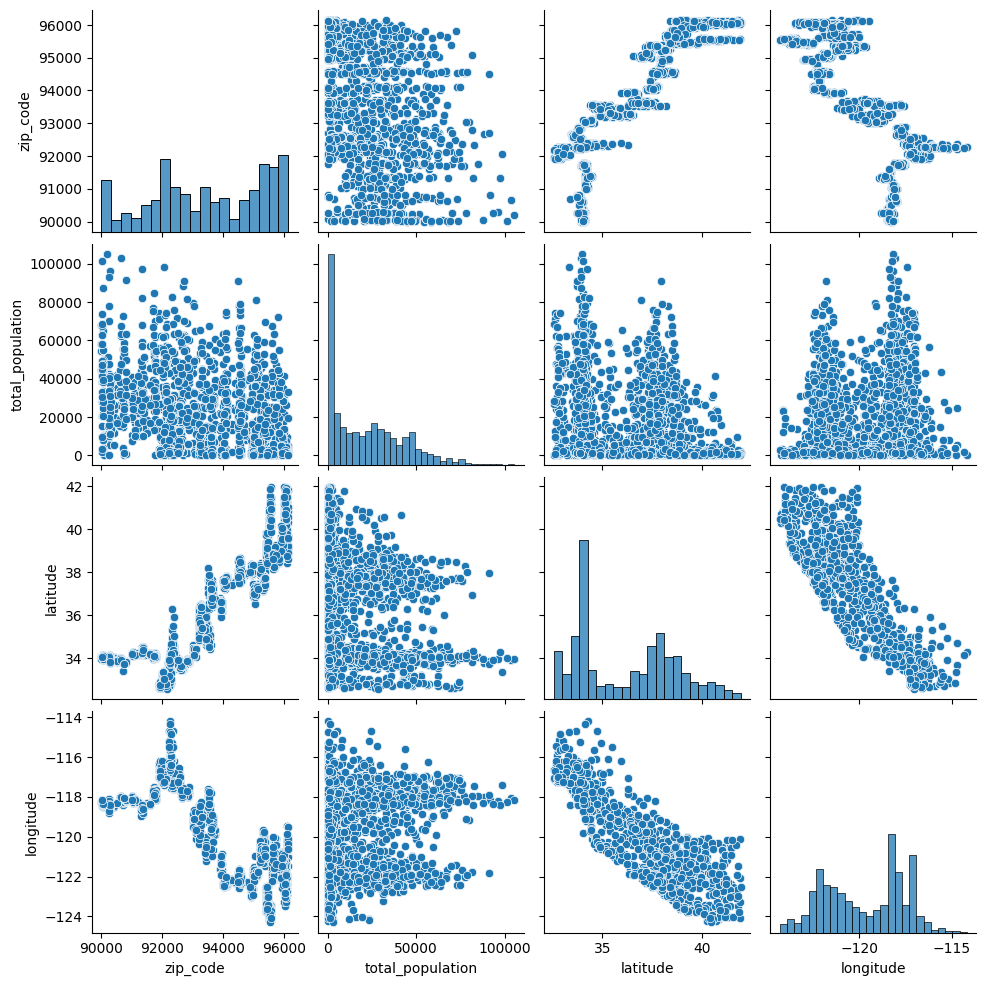

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df[df['country'] != 'United States']

,customer_id,country,state,city,zip_code,total_population,latitude,longitude


In [11]:
df[df['state'] != 'California']

,customer_id,country,state,city,zip_code,total_population,latitude,longitude


- Al no poseer otra variable a nivel geográfico carece de sentido poseer las columnas 'country' y 'state' ya qu eestas solo poseen una variable y su ubicación la obtenemos mayormente de las columnas 'latitud' y 'longitud'

In [12]:
df = df.drop(columns=['state','country'])

In [13]:
df.to_csv(path_or_buf=r'data\clean\location_data_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [14]:
df = pd.read_csv(r"data\clean\location_data_clean.csv")
df.head()

,customer_id,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,Camarillo,93010,42853,34.227846,-119.079903


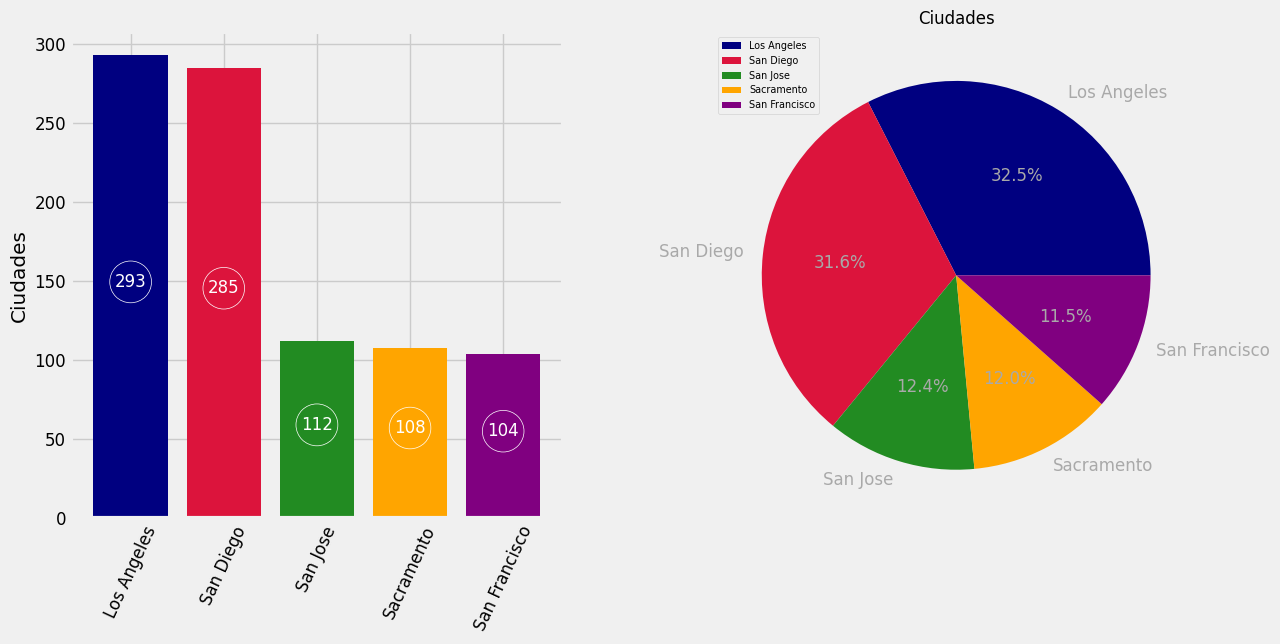

In [15]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Ciudades', labely='Ciudades', column_name='city')

- Abarcando el 32,5% nuestros usuarios provienen de la ciudad de Los Ángeles siguiendo por San diego con un 31,6%

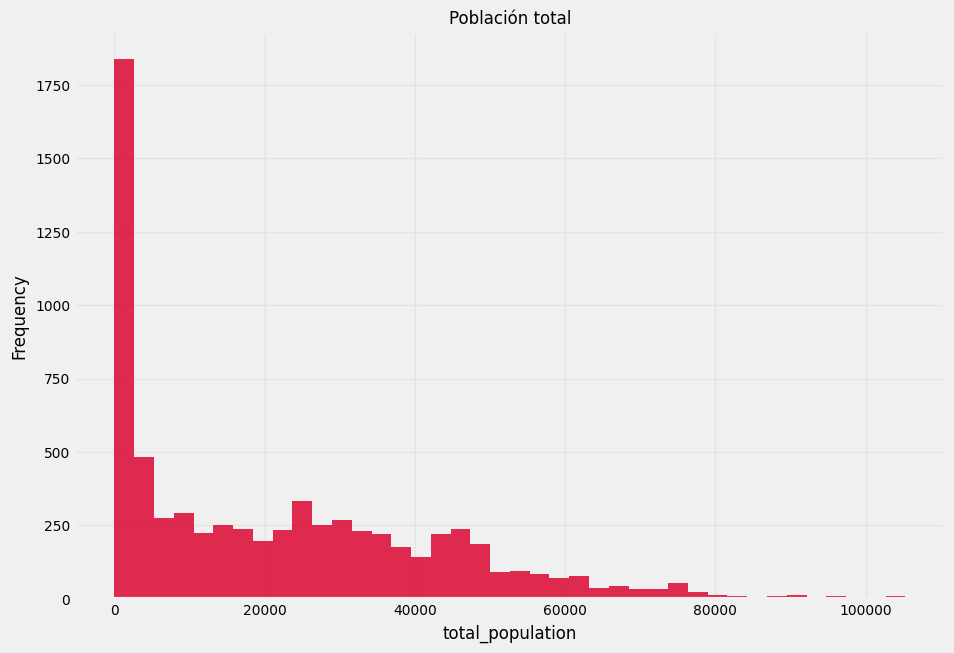

La distribución es leptocúrtica con una curtosis de 0.32. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 0.91.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_population,7043.0,22139.814568,17554.0,42239,21152.17,11.0,2344.0,17554.0,36125.0,105285.0,0.32,0.91


In [16]:
categorical_analyzer.plot_distribution(title= 'Población total', column_name='total_population', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

In [17]:
df[df['total_population'] == 11]

,customer_id,city,zip_code,total_population,latitude,longitude
1380,2040-XBAVJ,Malibu,90263,11,34.037037,-118.705803
2467,3530-CRZSB,Malibu,90263,11,34.037037,-118.705803
3308,4713-LZDRV,Malibu,90263,11,34.037037,-118.705803
5893,8292-FRFZQ,Malibu,90263,11,34.037037,-118.705803
6989,9919-YLNNG,Malibu,90263,11,34.037037,-118.705803


In [18]:
df[df['city'] == 'Malibu']

,customer_id,city,zip_code,total_population,latitude,longitude
202,0318-ZOPWS,Malibu,90265,19630,34.074572,-118.831181
1380,2040-XBAVJ,Malibu,90263,11,34.037037,-118.705803
2467,3530-CRZSB,Malibu,90263,11,34.037037,-118.705803
3308,4713-LZDRV,Malibu,90263,11,34.037037,-118.705803
5346,7551-JOHTI,Malibu,90265,19630,34.074572,-118.831181
5893,8292-FRFZQ,Malibu,90263,11,34.037037,-118.705803
6016,8498-XXGWA,Malibu,90265,19630,34.074572,-118.831181
6061,8591-NXRCV,Malibu,90265,19630,34.074572,-118.831181
6982,9909-IDLEK,Malibu,90265,19630,34.074572,-118.831181
6989,9919-YLNNG,Malibu,90263,11,34.037037,-118.705803


In [19]:
# %pip install folium
import folium

# Crear un mapa centrado en las coordenadas de California
mapa = folium.Map(location=[34.037037, -118.705803], zoom_start=13)

# Añadir marcadores para los registros problemáticos
for _, row in df[df['city'] == 'Malibu'].iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"Customer ID: {row['customer_id']}").add_to(mapa)

# Mostrar el mapa
mapa

In [20]:
print(df[df['total_population'] < 100].to_string())

     customer_id                   city  zip_code  total_population   latitude   longitude
23    0030-FNXPP                 Keeler     93530                71  36.560498 -117.962461
155   0256-LTHVJ                 Ludlow     92338                23  34.702766 -116.093376
162   0264-CNITK                   Clio     96106                88  39.745805 -120.580882
195   0310-SUCIN                 Darwin     93522                64  36.319181 -117.593053
295   0434-CSFON            Los Angeles     90071                21  34.052917 -118.255178
330   0487-RPVUM           Mount Hermon     95041                77  37.051166 -122.056194
344   0511-JTEOY             Canyon Dam     95923                86  40.171312 -121.120605
371   0549-CYCQN               Flournoy     96029                84  39.847840 -122.544556
494   0723-VSOBE               Dos Rios     95429                91  39.756049 -123.358701
604   0885-HMGPY               Honeydew     95545                82  40.342928 -124.063329

In [21]:
df[df['city'] == 'Twain']

,customer_id,city,zip_code,total_population,latitude,longitude
3621,5134-IKDAY,Twain,95984,73,40.022184,-121.062384
6026,8519-QJGJD,Twain,95984,73,40.022184,-121.062384
6560,9318-NKNFC,Twain,95984,73,40.022184,-121.062384
6980,9907-SWKKF,Twain,95984,73,40.022184,-121.062384


In [22]:
# %pip install folium
import folium

# Crear un mapa centrado en las coordenadas de California
mapa = folium.Map(location=[37.2502200, -119.7512600], zoom_start=5)

# Añadir marcadores para los registros problemáticos
for _, row in df[df['total_population'] < 50].iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"Customer ID: {row['customer_id']}").add_to(mapa)

# Mostrar el mapa
mapa


In [23]:
df['zip_code'] = df['zip_code'].astype(str)

resultado = df.groupby('zip_code')['total_population'].agg(min_population='min', max_population='max')

resultado

,min_population,max_population
zip_code,,
90001,54492,54492
90002,44586,44586
90003,58198,58198
90004,67852,67852
90005,43019,43019
...,...,...
96143,4806,4806
96145,4002,4002
96146,942,942


In [24]:
resultado[resultado['min_population'] != resultado['max_population']]

,min_population,max_population
zip_code,,


- Luego de analizar nuestro dataset nos encontramos que el código postal 90263 Malibu, CA contaba con una población estimada de 11 habitantes lo que genera dudas a simple vista y fuimos encontrando otras áreas también de rangos menores en cuanto a nivel poblacional. Al agrupar estos por el codigo postal nos dimos cuenta que tanto el mínimo registrado como el máximo era el mismo, lo que indicaría que el área a tratar no es de gran nivel territorial. Aún así viendo fuentes de datos como la página oficial de los Estados Unidos nos damos cuenta que ese valor no es del todo correcto y que dependerá luego si quisiseramos un análisis de mayor índole la modificación de estos.

### Análisis exploratorio basado en el status del cliente.

In [25]:
df1 = pd.read_csv(r"data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [26]:
df2.head()

,customer_id,city,zip_code,total_population,latitude,longitude,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,Frazier Park,93225,4498,34.827662,-118.999073,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,Glendale,91206,31297,34.162515,-118.203869,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,Costa Mesa,92627,62069,33.645672,-117.922613,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,Martinez,94553,46677,38.014457,-122.115432,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,Camarillo,93010,42853,34.227846,-119.079903,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### **3️⃣. Hipótesis sobre la Ubicación Geográfica y Churn**  
- **Hipótesis:** Existen diferencias en la tasa de abandono de clientes según la **latitud y longitud**, lo que podría indicar patrones regionales en el churn.  

---

In [27]:
from scipy.stats import spearmanr


# Calcular la correlación de Spearman entre churn y coordenadas geográficas
corr_lat, p_lat = spearmanr(df2['churn_label'], df2['latitude'])
corr_lon, p_lon = spearmanr(df2['churn_label'], df2['longitude'])

print(f"Correlación entre churn y latitud: {corr_lat}, p-valor: {p_lat}")
print(f"Correlación entre churn y longitud: {corr_lon}, p-valor: {p_lon}")

# Evaluar significancia estadística
alpha = 0.05
if p_lat < alpha:
    print("La latitud tiene una relación significativa con churn.")
else:
    print("No hay suficiente evidencia para concluir que la latitud influye en churn.")

if p_lon < alpha:
    print("La longitud tiene una relación significativa con churn.")
else:
    print("No hay suficiente evidencia para concluir que la longitud influye en churn.")


Correlación entre churn y latitud: -0.046323736378060504, p-valor: 0.00010065593260520903
Correlación entre churn y longitud: 0.030386848883353405, p-valor: 0.010763671400496909
La latitud tiene una relación significativa con churn.
La longitud tiene una relación significativa con churn.


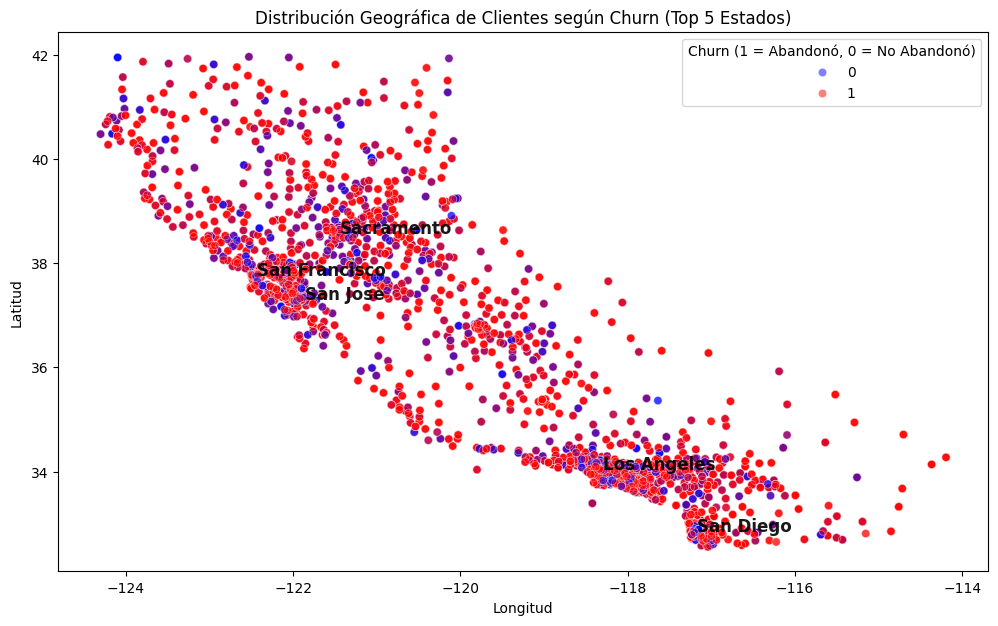

In [36]:
plt.figure(figsize=(12, 7))

# Crear scatterplot de churn
scatter = sns.scatterplot(
    data=df2, x='longitude', y='latitude', hue='churn_label',
    palette={0: 'blue', 1: 'red'}, alpha=0.5
)

# Obtener los 5 estados con más churn
top_states = df2[df2['churn_label'] == 1]['city'].value_counts().head(5).index

# Agregar etiquetas solo en el centro de los puntos de cada estado
for state in top_states:
    state_data = df2[df2['city'] == state]
    plt.text(state_data['longitude'].mean(),  # Promedio de longitud
             state_data['latitude'].mean(),   # Promedio de latitud
             state, fontsize=12, fontweight='bold', color='black', alpha=0.9)

plt.title("Distribución Geográfica de Clientes según Churn (Top 5 Estados)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Churn (1 = Abandonó, 0 = No Abandonó)")
plt.show()
